# Fitting, overfitting and decision boundary of decision trees
### Using the validation to tune hyperparameters 
### Using SciKit's "Grid Search Cross-Validation"

Imports

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Loading and preparing the data into pandas data frame

In [23]:
# Load the data
csvFileName = r"overfitting2.csv"      
df = pd.read_csv(csvFileName)

# Set the features (independednt variables, attributes) and target
feature_cols = ['A', 'B']
target_var = 'Target'

# get Numpy arrays
X = df[feature_cols].values             
y = df[target_var].values

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) #70 base
df

,A,B,Target
0,0.552018,0.419801,C2
1,0.567513,0.470665,C2
2,0.537962,0.461516,C2
3,0.531651,0.452415,C2
4,0.496490,0.474301,C2
...,...,...,...
1815,0.243819,0.775366,C1
1816,0.436208,0.863589,C1
1817,0.058180,0.056448,C1
1818,0.037929,0.020784,C1


Plotting the train and the test (validation) dataset

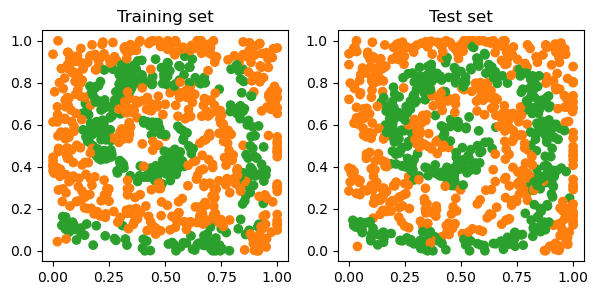

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

#fig.suptitle('Training and validation set')
ax1.scatter(X_train[:,0], X_train[:,1], c= y_train)
ax1.set_title('Training set')
ax2.scatter(X_test[:,0], X_test[:,1], c= y_test)
ax2.set_title('Test set')

plt.show() 

### Note:
There is an obvious pattern and some noise in both the training and the test set.


### Plotting the accuracy on the train and test set with increasing tree sizes

In [25]:
# Train and evaluate the trees on the train and trst set
max_nodes = list(range(2,100))  # list of max tree sizes
accuracy_test = []    # list to store test set accuracies
accuracy_train = []   # list to store training set accuracies 

for i in max_nodes: # looping through tree sizes
    decision_tree = tree.DecisionTreeClassifier(max_leaf_nodes=i)   # Learner
    decision_tree.fit(X_train, y_train)                             # Classifier

    y_pred_train = decision_tree.predict(X_train)                   # Predictions for train set
    accuracy_train.append(metrics.accuracy_score(y_train, y_pred_train)) # store accuracy to train list

    y_pred_test = decision_tree.predict(X_test)                     # Prediction for test set
    accuracy_test.append(metrics.accuracy_score(y_test, y_pred_test)) # store accuracy to test list
    

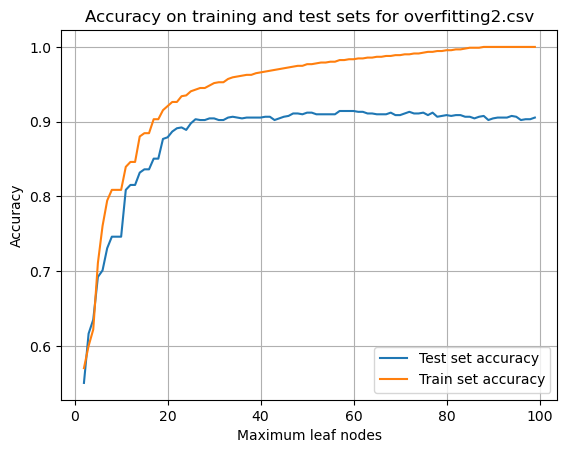

In [26]:
# Visualize the results 
plt.plot(max_nodes, accuracy_test, label='Test set accuracy') 
plt.plot(max_nodes, accuracy_train, label='Train set accuracy')
plt.legend()
plt.xlabel('Maximum leaf nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy on training and test sets for '+ csvFileName)
plt.grid()

Interpretation:
   - Training set accuracy goes from 0.97 to 1 with increasing tree size.
   - At *max_leaf_nodes=43*, the tree perfectly fits the training data (accuracy = 100%).
   - Test set accuracy starts at about 0.93, grows to 0.933 at *max_leaf_nodes=5*, and starts dropping towards 0.91 as the tree size increases.
   - Trees of size below 5 **underfit** our data and tree sizes above 5 **overfit** our data.
   - Tree with *max_leaf_nodes= 5* properly fits the data.
   

### Visual Proof: Plotting the decision boundary
Our tree takes as inputs pairs of numbers from [0, 1]x[0, 1]. We willl classify all points from this square (with resolution 0.1) and visualize the decision boundaries for different tree sizes.

In [27]:
# greate a square grid of points with resolution 0.1
x, y = [], []
for i in range(0, 100):
    for j in range(0, 100):
        x.append(i/100)
        y.append(j/100)
grid = pd.DataFrame(list(zip(x,y)), columns=["A","B"]) # pairs of points


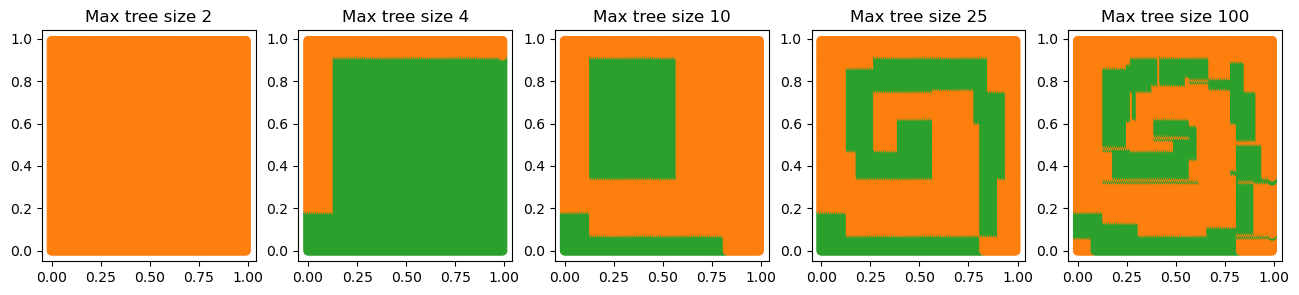

In [28]:
# Plotting decision boundaries for different sizes of trees
max_nodes = [2, 4, 10, 25, 100]
fig, axes = plt.subplots(nrows=1, ncols=len(max_nodes), figsize=(3.2*len(max_nodes), 3))
for i, nodes in enumerate(max_nodes):  # iterate through max tree size
    decision_tree = tree.DecisionTreeClassifier(max_leaf_nodes=nodes)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(grid.values) 
    axes[i].scatter(grid["A"], grid["B"], c=y_pred) 
    axes[i].set_title('Max tree size '+str(nodes))
plt.show() #we don't want to overfit to specific exceptional examples

### Exercises:
1. Change the random seed in the train_test_split to see how it influences the result.
2. Repeat the exercise on overfitting2.csv. Assess the optimal tree size.

In [ ]:
#done

# The Validation Set

In machine learning, data is typically divided into three sets: **training set**, **validation set**, and **test set**, in order to evaluate and validate the performance of a machine learning model. The reason for using a **validation set** in addition to a training set and a test set is to improve the model's ability to generalize to new, unseen data.

- Training Set: This is the subset of the data used to train the machine learning model. The model learns from the patterns present in the training data.

- Validation Set: Models needs to be tuned for hyperparameters and other configuration settings to optimize its performance. This tuning is done using the validation set. The model's performance is evaluated on the validation set, and based on this evaluation, hyperparameters can be adjusted, or different algorithms or architectures can be experimented with. The validation set helps in preventing overfitting, where a model performs well on the training data but fails to generalize to new, unseen data. 

- Test Set: This set is not used during the training or validation phases. It is kept separate until the model is completely trained and tuned. The test set is used to evaluate the final model's performance on new, unseen data. It provides an unbiased evaluation of the model's ability to generalize to previously unseen examples.

The use of a separate validation set ensures that the model is not biased towards the test set. If the model is tuned based on test set performance, it might not perform well on truly unseen data because it has essentially been optimized to fit the peculiarities of the test set. Therefore, a validation set acts as an intermediary step to ensure the model is performing well on data it hasn't seen before without contaminating the test set.

An alternative to using the train an validation set is cross-validation within the training set.

# Hyperparameter tuning
In scikit-learn, hyperparameter tuning is usually performed using **Grid Search Cross-Validation** or **Randomized Search Cross-Validation**. These techniques help find the best set of hyperparameters for the machine learning algorithm and data at hand. 

## Grid Search Cross-Validation
Grid Search is a technique that exhaustively tries all possible combinations of hyperparameter values in the specified range. 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Data: We use the same data as before, but load it again
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"overfitting2.csv")
feature_cols = ['A', 'B']
target_var = 'Target'
X = df[feature_cols].values             
y = df[target_var].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=70)


# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 10, 25, 100],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5) # I checked, cv=5 is the default
grid_search.fit(X, y)


# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}


## Exercise

1. Train a decision tree with the best parameters found on the training set
2. Evaluate the accuracy on the test set
3. Plot the decision boundaries of the best decision tree













In [30]:
# 1. Train a decision tree with the best parameters found on the training set
# 2. Evaluate the accuracy on the test set

decision_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= None, min_samples_split= 2)   # Learner
decision_tree.fit(X_train, y_train)                             # Classifier

y_pred_train = decision_tree.predict(X_train)                   # Predictions for train set
print ("Accuracy on train data: ", metrics.accuracy_score(y_test, y_pred_test))

y_pred_test = decision_tree.predict(X_test)                   # Predictions for train set
print ("Accuracy on test data: ", metrics.accuracy_score(y_test, y_pred_test))






Accuracy on train data:  0.521978021978022
Accuracy on test data:  0.8769230769230769


### Solution

In [33]:
# 1. Train a decision tree with the best parameters found on the training set
# 2. Evaluate the accuracy on the test set

decision_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= None, min_samples_split= 2)   # Learner
decision_tree.fit(X_train, y_train)                             # Classifier

y_pred_train = decision_tree.predict(X_train)                   # Predictions for train set
print ("Accuracy on train data: ", metrics.accuracy_score(y_test, y_pred_train))

y_pred_test = decision_tree.predict(X_test)                   # Predictions for train set
print ("Accuracy on test data: ", metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train data:  0.5054945054945055
Accuracy on test data:  0.8824175824175824


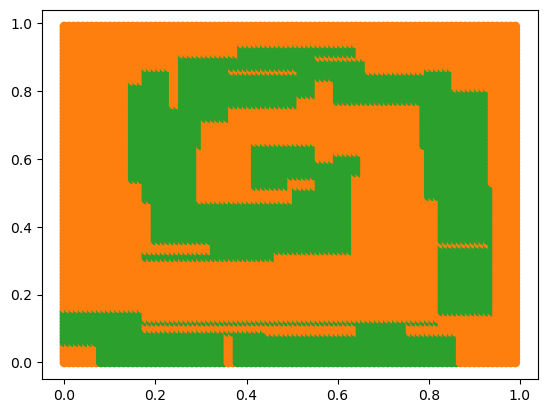

In [35]:
# 3. Plot the decision boundaries of the best decision tree
# Visualize the decision boundary

# Predict the values on the grid
y_pred_grid = decision_tree.predict(grid.values)

# Plot the decision boundary
plt.scatter(grid["A"], grid["B"], c=y_pred_grid)




How to properly compare different kind of models? Decision trees vs. Random Forest vs. SVMs  ...?